Accuracy: 0.7586805555555556
Classification Report:
               precision    recall  f1-score   support

           0       0.50      0.46      0.48       140
           1       0.83      0.86      0.84       436

    accuracy                           0.76       576
   macro avg       0.67      0.66      0.66       576
weighted avg       0.75      0.76      0.75       576

Confusion Matrix:
 [[ 64  76]
 [ 63 373]]


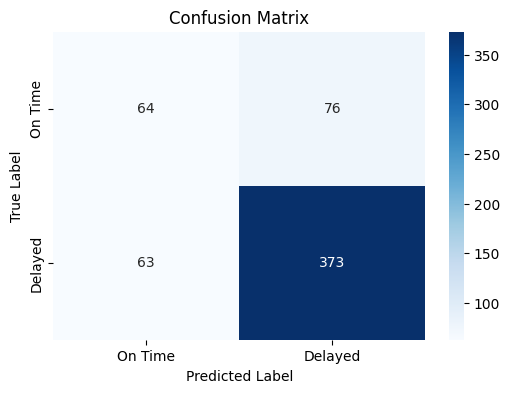

In [3]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, accuracy_score, confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt

# Load the data
file_path = 'train.csv'
data = pd.read_csv(file_path)

# Create binary target variable
# Assuming a delay threshold of 10 minutes for "Delayed" vs. "On Time"
delay_threshold = 10
data['Delay_Category'] = (data['Historical Delay (min)'] > delay_threshold).astype(int)

# Drop the original 'Historical Delay (min)' column
data = data.drop(columns=['Historical Delay (min)'])

# Assign numeric values to 'Route Congestion' based on assumed congestion levels
congestion_mapping = {'Low': 1, 'Medium': 2, 'High': 3}
data['Route Congestion'] = data['Route Congestion'].map(congestion_mapping)

# Assign numeric values to 'Weather Conditions' based on assumed impact levels on delay
weather_mapping = {'Clear': 1, 'Rainy': 2, 'Foggy': 3}
data['Weather Conditions'] = data['Weather Conditions'].map(weather_mapping)

# Encode other categorical variables
categorical_features = ['Day of the Week', 'Time of Day', 'Train Type']
data = pd.get_dummies(data, columns=categorical_features, drop_first=True)

# Split data into features (X) and target (y)
X = data.drop(columns=['Delay_Category'])
y = data['Delay_Category']

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Standardize the feature set
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

# Train logistic regression model
model = LogisticRegression()
model.fit(X_train, y_train)

# Make predictions on the test set
y_pred = model.predict(X_test)

# Evaluate the model
print("Accuracy:", accuracy_score(y_test, y_pred))
print("Classification Report:\n", classification_report(y_test, y_pred))

# Print and plot the confusion matrix
conf_matrix = confusion_matrix(y_test, y_pred)
print("Confusion Matrix:\n", conf_matrix)

# Plot confusion matrix using Seaborn
plt.figure(figsize=(6, 4))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', xticklabels=['On Time', 'Delayed'], yticklabels=['On Time', 'Delayed'])
plt.xlabel("Predicted Label")
plt.ylabel("True Label")
plt.title("Confusion Matrix")
plt.show()


Accuracy: 0.7586805555555556
Classification Report:
               precision    recall  f1-score   support

           0       0.50      0.46      0.48       140
           1       0.83      0.86      0.84       436

    accuracy                           0.76       576
   macro avg       0.67      0.66      0.66       576
weighted avg       0.75      0.76      0.75       576

Confusion Matrix:
 [[ 64  76]
 [ 63 373]]


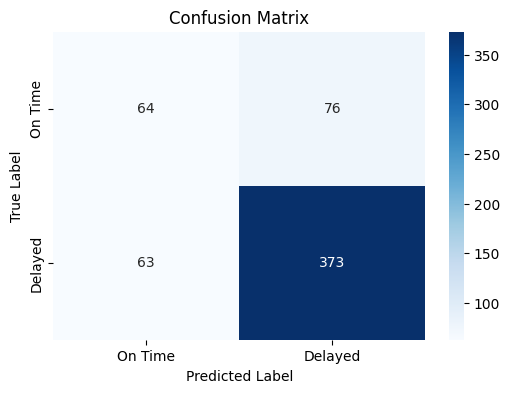


First 10 rows with predicted delay results:
   Row Number Predicted Delay
0           1         Delayed
1           2         On Time
2           3         On Time
3           4         Delayed
4           5         On Time
5           6         Delayed
6           7         Delayed
7           8         Delayed
8           9         Delayed
9          10         On Time


In [1]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, accuracy_score, confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt

# Load the data
file_path = 'train.csv'
data = pd.read_csv(file_path)

# Create binary target variable
# Assuming a delay threshold of 10 minutes for "Delayed" vs. "On Time"
delay_threshold = 10
data['Delay_Category'] = (data['Historical Delay (min)'] > delay_threshold).astype(int)

# Drop the original 'Historical Delay (min)' column
data = data.drop(columns=['Historical Delay (min)'])

# Assign numeric values to 'Route Congestion' based on assumed congestion levels
congestion_mapping = {'Low': 1, 'Medium': 2, 'High': 3}
data['Route Congestion'] = data['Route Congestion'].map(congestion_mapping)

# Assign numeric values to 'Weather Conditions' based on assumed impact levels on delay
weather_mapping = {'Clear': 1, 'Rainy': 2, 'Foggy': 3}
data['Weather Conditions'] = data['Weather Conditions'].map(weather_mapping)

# Encode other categorical variables
categorical_features = ['Day of the Week', 'Time of Day', 'Train Type']
data = pd.get_dummies(data, columns=categorical_features, drop_first=True)

# Split data into features (X) and target (y)
X = data.drop(columns=['Delay_Category'])
y = data['Delay_Category']

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Standardize the feature set
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

# Train logistic regression model
model = LogisticRegression()
model.fit(X_train, y_train)

# Make predictions on the test set
y_pred = model.predict(X_test)

# Evaluate the model
print("Accuracy:", accuracy_score(y_test, y_pred))
print("Classification Report:\n", classification_report(y_test, y_pred))

# Print and plot the confusion matrix
conf_matrix = confusion_matrix(y_test, y_pred)
print("Confusion Matrix:\n", conf_matrix)

# Plot confusion matrix using Seaborn
plt.figure(figsize=(6, 4))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', xticklabels=['On Time', 'Delayed'], yticklabels=['On Time', 'Delayed'])
plt.xlabel("Predicted Label")
plt.ylabel("True Label")
plt.title("Confusion Matrix")
plt.show()

# Output the first 10 rows with row number and delayed or not result
predictions_df = pd.DataFrame({'Row Number': range(1, 11), 'Predicted Delay': y_pred[:10]})
predictions_df['Predicted Delay'] = predictions_df['Predicted Delay'].map({0: 'On Time', 1: 'Delayed'})
print("\nFirst 10 rows with predicted delay results:")
print(predictions_df)
